# TOOLS 1 - FINAL PROJECT

By: Chris Sunderland, Sean Wendlandt, Matt Krzewinski

The related GitHub Repository can be found here: https://git.cs.du.edu/matkrzew/tool1_final_project/-/tree/main/

# Dataset Motivation

We chose a sports dataset because all of our group members have played sports at a high level in the past and still have an interest in how statistics impact the outcomes and various aspects of matches. We choose tennis data specifically due to two of our members being familiar with the sport and have played previously at a competitive level. Furthermore, we chose tennis because of the multitude of tracked statistics which give a good opportunity for insight based on the metadata.

# Dataset

The data used in our project's analysis was found via a GitHub repository named “tennis_atp” which was created by a tennis fanatic named Jeff Sackmann. He made this repository to provide tennis data for free for academic purposes given we cite his data properly. When initially choosing this data we decided to look at 3 years of tennis ATP tournaments during the years 2015-2017.  We decided this was an appropriate dataset as there were a good deal of missing values initially and the dataset allowed for an ample amount of feature engineering opportunities.

Below is a link to the repository. This GitHub repository also includes match data from all ATP seasons from the current year dating back to 1968. 
 
The descriptions of some of the fields we will be using in our project are briefly outlined below, but for further information, please refer to the following link describing the fields:
https://github.com/JeffSackmann/tennis_atp/blob/master/matches_data_dictionary.txt
 
 
* surface (string) = match playing surface (hard court, clay, or grass)
* tourney_date (integer) = tournament start date
* score (string) = match result
* minutes (float) = match length
* round (string) = tournament round
* best_of (integer) = tournament format (best of 3 or best of 5 sets)
* age (float) = player age
* rank (float) = player ATP ranking
* ace (float) = total number of aces
* df (float) = total number of double faults
* svpt (float) = total number of serve points
* 1stIn (float) = total number of first serves made
* 1stWon  (float) = total number of first-serve points won
* 2ndWon (float) = total number of second-serve points won           
* SvGms (float) = total number of serve games          
* bpSaved (float) = total number of break points saved        
* bpFaced (float) = total number of break points faced


# Research Question & Real World Impact

The goal of this analysis was to predict match winners with some degree of precision and to identify the factors that played the biggest roles in determining whether a professional tennis player eventually won or lost a match. The input data used were three separate datasets that contained information about Association of Tennis Professionals (ATP) matches that were played during the 2015, 2016, and 2017 seasons. In their original form, the records in these datasets included statistics for both the winning and losing players of a match. The decision was made to reformat and combine these three datasets into a new dataset composed of records that only corresponded to one player and included a class label identifying whether a player won or lost the match.

With the data in this form, the analysis carried out below first attempted to address the research question by computing summary statistics to identify the top players that competed during these years. These elite players’ performance metrics were then compared against those of other professionals that competed between 2015 and 2017. Additionally, several classification models were implemented to predict whether a player won or lost a match. These models also suggested that the biggest drivers in determining the eventual outcome of a match were the ranking of one’s opponent and how well a player performed while serving.

This analysis would be valuable for making match predictions (gambling) as well as being useful to companies as it may impact potential sponsorships based on which players have a likelihood of winning. Furthermore, these kind of studies can help players identify deficiencies in their games by giving them a sense of what their target numbers should be for certain metrics.

# Literature Review and Previous Work

There has been a lot of work done when it comes to using sports data to try to predict who will win a match and what parts of the game players should focus on to increase their chances of winning. One example of doing this on tennis data was done by Thomas L. Saaty from the University of Pittsburgh. His paper is about predicting the outcome of tennis matches of the Association of Tennis Professionals (ATP) and the Women’s Tennis Association (WTA) using both data and judgments. Using this and placing weights subjectively and objectively, the accuracy of their proposed model reached 85.1% when applying the model to the 2015 US Open matches before they took place. Using official ratings in their paper to simulate major tennis tournaments, Clarke and Dyte applied a logistic regression model to predict a player's chance of winning. There are quite a few more related pieces, each providing their own models and key data points.

Our work is novel compared to these papers because we used statistics from the matches themselves to build our models. While these other studies used ranking and physical fitness to predict outcomes before they happened, we used match statistic data to determine which statistics best determine if a player will win or lose a match. For example, an important feature we saw was breakpoints, and from our analysis we can draw the conclusion that if a player is facing a lot of breakpoints, that is a strong indication they will lose a match. While any tennis fan may believe this is true, it is interesting to see a model is placing the biggest emphasis on this feature. 

# Reading in the Data

In [233]:
# Importing modules
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, cross_validate

In [234]:
# Set pandas options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', None)

In [235]:
# Load atp tennis data into dataframes
df_2015 = pd.read_csv("atp_data.txt")
df_2016 = pd.read_csv("atp_matches_2016.txt")
df_2017 = pd.read_csv("atp_matches_2017.txt")

In [236]:
# View each df
df_2015.head(3)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2015-339,Brisbane,Hard,28,A,20150104,1,105357,NaN,WC,John Millman,R,183.0,AUS,25.5,105733,NaN,Q,Rhyne Williams,R,185.0,USA,23.7,6-3 6-1,3,R32,65.0,6.0,2.0,44.0,24.0,19.0,14.0,8.0,1.0,1.0,3.0,4.0,50.0,31.0,20.0,5.0,8.0,1.0,5.0,153.0,328.0,220.0,221.0
1,2015-339,Brisbane,Hard,28,A,20150104,2,103813,NaN,NaN,Jarkko Nieminen,L,185.0,FIN,33.4,106045,NaN,Q,Denis Kudla,R,180.0,USA,22.3,4-6 6-1 6-4,3,R32,104.0,4.0,0.0,92.0,59.0,39.0,17.0,14.0,4.0,7.0,6.0,1.0,83.0,50.0,26.0,19.0,13.0,3.0,8.0,73.0,689.0,123.0,440.0
2,2015-339,Brisbane,Hard,28,A,20150104,3,105902,NaN,WC,James Duckworth,R,183.0,AUS,22.9,104468,6.0,NaN,Gilles Simon,R,183.0,FRA,30.0,6-2 6-2,3,R32,68.0,4.0,0.0,45.0,27.0,20.0,11.0,8.0,2.0,3.0,2.0,1.0,56.0,37.0,22.0,5.0,8.0,10.0,15.0,125.0,430.0,21.0,1730.0


In [237]:
df_2016.head(3)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2016-M020,Brisbane,Hard,32,A,20160104,271,105062,NaN,NaN,Mikhail Kukushkin,R,183.0,KAZ,28.0,104797,NaN,NaN,Denis Istomin,R,188.0,UZB,29.3,6-2 7-5,3,R32,84.0,1.0,3.0,67.0,36.0,27.0,20.0,10.0,3.0,3.0,6.0,0.0,53.0,32.0,22.0,12.0,10.0,4.0,7.0,65.0,762.0,61.0,781.0
1,2016-M020,Brisbane,Hard,32,A,20160104,272,103285,NaN,PR,Radek Stepanek,R,185.0,CZE,37.1,105583,NaN,NaN,Dusan Lajovic,R,180.0,SRB,25.5,6-0 6-3,3,R32,67.0,3.0,2.0,48.0,25.0,18.0,16.0,8.0,2.0,2.0,0.0,2.0,46.0,25.0,15.0,8.0,7.0,4.0,8.0,197.0,252.0,76.0,678.0
2,2016-M020,Brisbane,Hard,32,A,20160104,273,106071,7.0,NaN,Bernard Tomic,R,193.0,AUS,23.2,103917,NaN,NaN,Nicolas Mahut,R,190.0,FRA,33.9,6-4 6-3,3,R32,69.0,8.0,0.0,59.0,34.0,28.0,14.0,10.0,4.0,5.0,4.0,1.0,50.0,29.0,21.0,10.0,9.0,3.0,6.0,18.0,1675.0,71.0,710.0


In [238]:
df_2017.head(3)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2017-M020,Brisbane,Hard,32,A,20170102,271,104678,NaN,NaN,Viktor Troicki,R,193.0,SRB,30.8,106415,NaN,Q,Yoshihito Nishioka,L,170.0,JPN,21.2,6-4 7-5,3,R32,91.0,11.0,5.0,64.0,45.0,35.0,6.0,11.0,1.0,3.0,0.0,1.0,82.0,53.0,33.0,13.0,11.0,6.0,10.0,29.0,1385.0,100.0,604.0
1,2017-M020,Brisbane,Hard,32,A,20170102,272,106378,NaN,NaN,Kyle Edmund,R,188.0,GBR,21.9,124014,NaN,Q,Ernesto Escobedo,R,185.0,USA,20.4,7-6(4) 7-6(6),3,R32,130.0,11.0,2.0,83.0,48.0,37.0,19.0,12.0,2.0,3.0,11.0,3.0,113.0,67.0,39.0,27.0,12.0,9.0,10.0,45.0,1001.0,141.0,443.0
2,2017-M020,Brisbane,Hard,32,A,20170102,273,106298,6.0,NaN,Lucas Pouille,R,185.0,FRA,22.8,104468,NaN,NaN,Gilles Simon,R,183.0,FRA,32.0,7-6(6) 7-6(4),3,R32,125.0,7.0,2.0,102.0,52.0,37.0,24.0,12.0,8.0,12.0,1.0,4.0,76.0,42.0,29.0,16.0,12.0,0.0,4.0,15.0,2156.0,25.0,1585.0


# Data Cleaning

#### Define a function to reformat the datasets 

 - Return a new dataset that can be used in classification models and to compute aggregate statistics
 - Have rows for both the winner and loser of a match

In [239]:
def win_loss_df(df):
    
    winner_df = df.copy()
    loser_df = df.copy()
    
    winner_columns = {'winner_id': 'id', 'winner_seed': 'seed', 'winner_entry': 'entry', 'winner_name': 'name',
                      'winner_hand': 'hand', 'winner_ht': 'height', 'winner_ioc': 'country', 'winner_age': 'age',
                      'w_ace': 'aces', 'w_df': 'double_faults', 'w_svpt': 'svpt', 'w_1stIn': '1stIn',
                      'w_1stWon': '1stWon', 'w_2ndWon': '2ndWon', 'w_SvGms': 'SvGms', 'w_bpSaved': 'bpSaved', 
                      'w_bpFaced': 'bpFaced', 'winner_rank': 'player_rank', 'winner_rank_points': 'rank_points', 
                      'loser_hand': 'opponent_hand', 'loser_age': 'opponent_age', 'loser_rank': 'opponent_rank', 
                      'loser_id': 'opponent_id'}
    
    loser_columns = {'loser_id': 'id', 'loser_seed': 'seed', 'loser_entry': 'entry', 'loser_name': 'name',
                     'loser_hand': 'hand', 'loser_ht': 'height', 'loser_ioc': 'country', 'loser_age': 'age',
                     'l_ace': 'aces', 'l_df': 'double_faults', 'l_svpt': 'svpt', 'l_1stIn': '1stIn',
                     'l_1stWon': '1stWon', 'l_2ndWon': '2ndWon', 'l_SvGms': 'SvGms', 'l_bpSaved': 'bpSaved', 
                     'l_bpFaced': 'bpFaced', 'loser_rank': 'player_rank', 'loser_rank_points': 'rank_points', 
                     'winner_hand': 'opponent_hand', 'winner_age': 'opponent_age', 'winner_rank': 'opponent_rank', 
                     'winner_id': 'opponent_id'}
    
    winner_df.rename(columns=winner_columns, inplace=True)
    loser_df.rename(columns=loser_columns, inplace=True)

    # drop most columns associated with the winning/losing player of a match
    winner_df = winner_df.drop(winner_df.filter(regex="^l").columns, axis=1)
    loser_df = loser_df.drop(loser_df.filter(regex="^w").columns, axis=1)

    # add class label
    winner_df['result'] = 1
    loser_df['result'] = 0
    
    # change index values of winner dataframe (to help with future concat)
    winner_df.index = winner_df.index.map(lambda x: 2 * x)
    loser_df.index = loser_df.index.map(lambda x: 2 * x + 1)

    # Standardize column order
    column_order = ['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level', 'tourney_date', 'match_num',
                    'id', 'seed', 'entry', 'name', 'hand', 'height', 'country', 'age', 'score', 'best_of', 'round',
                    'minutes', 'aces', 'double_faults', 'svpt', '1stIn', '1stWon', '2ndWon', 'SvGms', 'bpSaved',
                    'bpFaced', 'player_rank', 'rank_points', 'opponent_hand', 'opponent_age', 'opponent_rank', 
                    'opponent_id','result']
    
    winner_df = winner_df.reindex(columns=column_order)
    loser_df = loser_df.reindex(columns=column_order)

    merged_df = pd.concat([winner_df, loser_df])
    merged_df.sort_index(inplace=True)
    
    # start changing column data types
    merged_df['tourney_date'] = pd.to_datetime(merged_df['tourney_date'], format='%Y%m%d')
        
    return merged_df

In [240]:
df1 = win_loss_df(df_2015)
df2 = win_loss_df(df_2016)
df3 = win_loss_df(df_2017)

In [241]:
# combine all dataframes into one
all_data = pd.concat([df1, df2, df3])

# reset index
all_data.reset_index(inplace=True, drop=True)

# print first 5 rows
all_data.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,id,seed,entry,name,hand,height,country,age,score,best_of,round,minutes,aces,double_faults,svpt,1stIn,1stWon,2ndWon,SvGms,bpSaved,bpFaced,player_rank,rank_points,opponent_hand,opponent_age,opponent_rank,opponent_id,result
0,2015-339,Brisbane,Hard,28,A,2015-01-04,1,105357,NaN,WC,John Millman,R,183.0,AUS,25.5,6-3 6-1,3,R32,65.0,6.0,2.0,44.0,24.0,19.0,14.0,8.0,1.0,1.0,153.0,328.0,R,23.7,220.0,105733,1
1,2015-339,Brisbane,Hard,28,A,2015-01-04,1,105733,NaN,Q,Rhyne Williams,R,185.0,USA,23.7,6-3 6-1,3,R32,65.0,3.0,4.0,50.0,31.0,20.0,5.0,8.0,1.0,5.0,220.0,221.0,R,25.5,153.0,105357,0
2,2015-339,Brisbane,Hard,28,A,2015-01-04,2,103813,NaN,NaN,Jarkko Nieminen,L,185.0,FIN,33.4,4-6 6-1 6-4,3,R32,104.0,4.0,0.0,92.0,59.0,39.0,17.0,14.0,4.0,7.0,73.0,689.0,R,22.3,123.0,106045,1
3,2015-339,Brisbane,Hard,28,A,2015-01-04,2,106045,NaN,Q,Denis Kudla,R,180.0,USA,22.3,4-6 6-1 6-4,3,R32,104.0,6.0,1.0,83.0,50.0,26.0,19.0,13.0,3.0,8.0,123.0,440.0,L,33.4,73.0,103813,0
4,2015-339,Brisbane,Hard,28,A,2015-01-04,3,105902,NaN,WC,James Duckworth,R,183.0,AUS,22.9,6-2 6-2,3,R32,68.0,4.0,0.0,45.0,27.0,20.0,11.0,8.0,2.0,3.0,125.0,430.0,R,30.0,21.0,104468,1


In [242]:
# Check shape of the df
all_data.shape

(17590, 35)

In [243]:
# Check for missing values 
all_data.isnull().sum()

tourney_id           0
tourney_name         0
surface              0
draw_size            0
tourney_level        0
tourney_date         0
match_num            0
id                   0
seed             11512
entry            14688
name                 0
hand                21
height             380
country              0
age                  0
score                0
best_of              0
round                0
minutes           3382
aces               778
double_faults      778
svpt               778
1stIn              778
1stWon             778
2ndWon             778
SvGms              778
bpSaved            778
bpFaced            778
player_rank        193
rank_points        193
opponent_hand       21
opponent_age         0
opponent_rank      193
opponent_id          0
result               0
dtype: int64

### Since we have missing values, we utilize several different methods below to handle this issue.

#### 'Seed' column - change to 1 if seeded or 0 if null (null means unseeded and most players are unseeded in a tournament, so we converted this column to seeded vs unseeded)

In [244]:
all_data['seed'] = all_data['seed'].map(lambda x: 1 if pd.notnull(x) else 0)

#### 'Entry' column - drop from dataframe (does not provide information we are looking to use, and since there are so many missing, we decided to drop the column)

In [245]:
all_data = all_data.drop('entry', axis=1)

#### 'Height' column - replace missing values with the median as height is normally distributed

In [246]:
all_data['height'] = all_data['height'].fillna(all_data['height'].median())

#### 'Hand' column - address missing values and 'U' values

- Replace 'hand' values that are either missing entirely or listed as unknown ('U')
- Randomly assign a value of 'R' or 'L' to these individuals
- Since approximately 12.5% of the players in the dataset are lefties, give each player roughly a 12.5% chance of being left-handed

In [247]:
all_data['hand'].value_counts()

R    14784
L     2558
U      227
Name: hand, dtype: int64

In [248]:
# filter 'all_data' to get matches where players' playing hand is nan or unknown ('U')
hand_unknown = all_data[(all_data['hand'].isnull()) | (all_data['hand'] == 'U')].copy()

# get the unique ID number of players with unknown playing hand
hand_unknown_unique = hand_unknown['id'].unique()

In [249]:
# calculate the proportion of players in the dataset that are left-handed
total_lefty = all_data[all_data['hand'] == 'L']['id'].nunique()
total_righty = all_data[all_data['hand'] == 'R']['id'].nunique()

prop_lefty = total_lefty / (total_lefty + total_righty)
prop_lefty

0.1252236135957066

In [250]:
# define function to assign a playing-hand to players with unknown playing hands
def assign_hand(): 
    playing_hand = np.random.binomial(n=1, p=prop_lefty, size=1)
    
    if playing_hand[0] == 0:
        return 'R'
    else:
        return 'L'

In [251]:
# create dictionary storing ID number, new playing-hand for players with previously-unknown 'hand' values
unknown_hand_map = dict((player_id, assign_hand()) for player_id in hand_unknown_unique)

In [252]:
# define function to help change hand values in the 'all_data' dataframe
def switch_hand(x):
    
    if x['hand'] == 'U':
        return unknown_hand_map[x['id']]
    else:
        return x['hand']


all_data['hand'] = all_data['hand'].fillna('U')

all_data['hand'] = all_data[['id', 'hand']].apply(switch_hand, axis=1)

In [253]:
# check if 'hand' changes worked
print('missing values count: ', all_data['hand'].isnull().sum(), '\n')
print(all_data['hand'].value_counts(), '\n')
print(len(all_data['hand']))

missing values count:  0 

R    14994
L     2596
Name: hand, dtype: int64 

17590


In [254]:
# see if 'hand values' from the dictionary above were correctly mapped to the dataframe
# number below in list is player ID number
all_data[['id', 'hand', 'name']][all_data['id'].isin(list(unknown_hand_map.keys())[0:3])]

,id,hand,name
111,106325,R,Jabor Al Mutawa
871,105281,R,Eric Quigley
1223,105497,L,Jose Hernandez
1226,105497,L,Jose Hernandez
3639,105497,L,Jose Hernandez
4955,105497,L,Jose Hernandez
7117,105497,L,Jose Hernandez
12301,105497,L,Jose Hernandez
15757,105497,L,Jose Hernandez


#### 'Opponent_Hand' column - handle missing values and 'U' values

- Fill these values by accessing the new hand assignments in the 'unknown_hand_map' dictionary created above
- Note that the same number of rows were previously missing values for both 'hand' and 'opponent_hand'

In [255]:
all_data['opponent_hand'] = all_data['opponent_hand'].fillna('U')
all_data['opponent_hand'].value_counts()

R    14784
L     2558
U      248
Name: opponent_hand, dtype: int64

In [256]:
all_data['opponent_hand'] = all_data.apply(lambda x: unknown_hand_map[x['opponent_id']] 
                                                 if x['opponent_hand'] == 'U' else x['opponent_hand'], axis=1)

In [257]:
# check if 'opponent_hand' changes worked
print('missing values count: ', all_data['opponent_hand'].isnull().sum(), '\n')
print(all_data['opponent_hand'].value_counts(), '\n')
print(len(all_data['opponent_hand']))

missing values count:  0 

R    14994
L     2596
Name: opponent_hand, dtype: int64 

17590


In [258]:
# see if 'opponent_hand' values were correctly mapped from the dictionary above

all_data[['opponent_id', 'opponent_hand']][all_data['opponent_id'].isin(list(unknown_hand_map.keys()))].head()

,opponent_id,opponent_hand
110,106325,R
870,105281,R
1222,105497,L
1227,105497,L
1248,122548,R


In [259]:
# Checking previous players assigned hands
#print(unknown_hand_map[106325])
#print(unknown_hand_map[105281])
#print(unknown_hand_map[105497])
#print(unknown_hand_map[122548])


#### Drop all matches (rows) where a player won by default (i.e. opponent injury)

In [260]:
# len(all_data[all_data['score'] == 'Walkover']) # 10 rows

In [261]:
# dropping matches where a person won by default - not relevant data
all_data = all_data[~all_data['score'].str.contains('RET')]
all_data = all_data[~all_data['score'].str.contains('W/O')]
all_data = all_data[all_data['score'] != 'Walkover'] # cuts 10 rows

#### 'Minutes' column - fill missing values using linear regression

In [262]:
# prepare score column values for use in LR model training to impute NA 'minutes' col replacement

# remove score values in paretheses and replace values in brackets with 1
def clean_parentheses(score_str):
    score_str = score_str.strip()    
    # split scores by space
    scores = score_str.split()
    for i, s in enumerate(scores):
        # check if score contains parenthesis
        if '(' in s:
            # extract number inside parenthesis
            num_in_paren = int(s[s.index('(')+1:s.index(')')])
            # extract numbers before parenthesis
            nums_before_paren = s[:s.index('(')].split('-')
            # replace scores with new scores
            scores[i] = '-'.join(nums_before_paren)
        # check if score is surrounded by brackets
        elif s[0] == '[' and s[-1] == ']':
            scores[i] = '1'
    
    # join scores with space and return
    return ' '.join(scores)


all_data['total_score'] = all_data['score'].apply(clean_parentheses)


# define function to calculate total score
def calculate_total_score(score_string):
    # split string on '-' and ' ' characters using re.split()
    scores = re.split('-| ', score_string)
    # convert each score string to integer and add together
    total_score = 0
    for s in scores:
        try:
            total_score += int(s)
        except ValueError:
            # handle invalid string by ignoring or returning a default value
            # for example, you could return None or raise an exception here
            pass
    return total_score

# apply function to clean_score column and create new total_score column
all_data['total_score'] = all_data['total_score'].apply(calculate_total_score)

In [263]:
#Filling missing NaN values for minutes using a simple LR model based on total games played during a match

# Select non-missing data points
df = all_data[['total_score', 'minutes']].dropna()

# Split into X (features) and y (target)
X = df[['total_score']]
y = df['minutes']

# Train the model
model = LinearRegression()
model.fit(X, y)

# Predict missing values
X_missing = all_data[all_data['minutes'].isnull()][['total_score']]
y_pred = model.predict(X_missing)

# Fill missing values with predicted values
all_data.loc[all_data['minutes'].isnull(), 'minutes'] = y_pred

#### 'rank_points' - drop column 

- 'player_rank' field conveys the same information

In [264]:
all_data.drop('rank_points', axis=1, inplace=True)

#### 'player_rank' & 'opponent_rank' - replace nans 

- Since the missing values in these fields represent unranked players, the decision was made to replace these missing values with the max value from the 'player_rank' column (highest ranking in the dataset)

In [265]:
lowest_ranking = all_data['player_rank'].max()
all_data['player_rank'].fillna(lowest_ranking, inplace=True)
all_data['opponent_rank'].fillna(lowest_ranking, inplace=True)

#### 'aces' through 'bpFaced' - drop rows containing missing values for this range of columns

- note that the same number of rows (matches) were missing values for all of these key match statistics
- these rows were ultimately dropped because there was no plausible way to replace them and doing so likely would have compromised this analysis

In [266]:
all_data.dropna(inplace=True)

In [267]:
all_data.isnull().sum() # The data is clean now

tourney_id       0
tourney_name     0
surface          0
draw_size        0
tourney_level    0
tourney_date     0
match_num        0
id               0
seed             0
name             0
hand             0
height           0
country          0
age              0
score            0
best_of          0
round            0
minutes          0
aces             0
double_faults    0
svpt             0
1stIn            0
1stWon           0
2ndWon           0
SvGms            0
bpSaved          0
bpFaced          0
player_rank      0
opponent_hand    0
opponent_age     0
opponent_rank    0
opponent_id      0
result           0
total_score      0
dtype: int64

### All missing data is now handled

#### Type Conversion

In [268]:
# Check datatypes
all_data.dtypes

tourney_id               object
tourney_name             object
surface                  object
draw_size                 int64
tourney_level            object
tourney_date     datetime64[ns]
match_num                 int64
id                        int64
seed                      int64
name                     object
hand                     object
height                  float64
country                  object
age                     float64
score                    object
best_of                   int64
round                    object
minutes                 float64
aces                    float64
double_faults           float64
svpt                    float64
1stIn                   float64
1stWon                  float64
2ndWon                  float64
SvGms                   float64
bpSaved                 float64
bpFaced                 float64
player_rank             float64
opponent_hand            object
opponent_age            float64
opponent_rank           float64
opponent

In [269]:
# change categorical columns to type 'category'
cat_cols = ['surface', 'draw_size', 'tourney_level', 'seed', 'hand', 'opponent_hand', 'best_of', 'round']
all_data[cat_cols] = all_data[cat_cols].astype('category')

In [270]:
# change the columns below to type 'object'
str_cols = ['match_num', 'id', 'opponent_id']
all_data[str_cols] = all_data[str_cols].astype('object')

In [271]:
# change the columns below to type 'int' since they're all discrete count values
int_cols = ['aces', 'double_faults', 'svpt', '1stIn', '1stWon', '2ndWon', 'SvGms', 'bpSaved', 'bpFaced', 
            'player_rank', 'opponent_rank', 'height']
all_data[int_cols] = all_data[int_cols].astype('int')

In [272]:
all_data.dtypes

tourney_id               object
tourney_name             object
surface                category
draw_size              category
tourney_level          category
tourney_date     datetime64[ns]
match_num                object
id                       object
seed                   category
name                     object
hand                   category
height                    int64
country                  object
age                     float64
score                    object
best_of                category
round                  category
minutes                 float64
aces                      int64
double_faults             int64
svpt                      int64
1stIn                     int64
1stWon                    int64
2ndWon                    int64
SvGms                     int64
bpSaved                   int64
bpFaced                   int64
player_rank               int64
opponent_hand          category
opponent_age            float64
opponent_rank             int64
opponent

In [273]:
all_data.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,id,seed,name,hand,height,country,age,score,best_of,round,minutes,aces,double_faults,svpt,1stIn,1stWon,2ndWon,SvGms,bpSaved,bpFaced,player_rank,opponent_hand,opponent_age,opponent_rank,opponent_id,result,total_score
0,2015-339,Brisbane,Hard,28,A,2015-01-04,1,105357,0,John Millman,R,183,AUS,25.5,6-3 6-1,3,R32,65.0,6,2,44,24,19,14,8,1,1,153,R,23.7,220,105733,1,16
1,2015-339,Brisbane,Hard,28,A,2015-01-04,1,105733,0,Rhyne Williams,R,185,USA,23.7,6-3 6-1,3,R32,65.0,3,4,50,31,20,5,8,1,5,220,R,25.5,153,105357,0,16
2,2015-339,Brisbane,Hard,28,A,2015-01-04,2,103813,0,Jarkko Nieminen,L,185,FIN,33.4,4-6 6-1 6-4,3,R32,104.0,4,0,92,59,39,17,14,4,7,73,R,22.3,123,106045,1,27
3,2015-339,Brisbane,Hard,28,A,2015-01-04,2,106045,0,Denis Kudla,R,180,USA,22.3,4-6 6-1 6-4,3,R32,104.0,6,1,83,50,26,19,13,3,8,123,L,33.4,73,103813,0,27
4,2015-339,Brisbane,Hard,28,A,2015-01-04,3,105902,0,James Duckworth,R,183,AUS,22.9,6-2 6-2,3,R32,68.0,4,0,45,27,20,11,8,2,3,125,R,30.0,21,104468,1,16


# Feature Engineering 

### Create new fields - 'sets played', 'total tiebreaks', 'tiebreak points',  'games lost', 'games won', 'proportion of games won'

Define a series of functions to manipulate the string values stored in the 'score' column and create the attributes listed above

*Relevant Terminology*
- Set: Each tennis match is composed of sets. In a 'best of 3' match, the first player to win 2 out of 3 sets wins  the match.
- Game: Each set is comprised of a number of games. The first player to win 6 games (by 2) wins the set.
- Tiebreak: A set goes to a tiebreak if two players have each won 6 games. The first player to win 7 points (by 2) in a tiebreak wins the tiebreak (and the set).

In [274]:
def sets_played(result):
    
    set_lst = result.split()
    
    if re.search(r'\[', set_lst[-1]):
        return len(set_lst) - 1
    else:
        return len(set_lst)

In [275]:
def total_tiebreaks(result):
    
    tiebreak_lst = re.findall(r'\([0-9]+\)', result)
    
    return len(tiebreak_lst)

In [276]:
def tiebreak_points(result):

    tiebreak_lst = re.findall(r'\([0-9]+\)', result)
    tiebreak_lst = [re.sub(r'[()]', '', i) for i in tiebreak_lst]
    tiebreak_lst = [(int(i)*2 + 2) if int(i) >= 6 else int(i) + 7 for i in tiebreak_lst]
    tiebreak_pts =  sum(tiebreak_lst)
    
    return tiebreak_pts

In [277]:
def games_lost(match):
    
    score_cleaned = clean_parentheses(match['score'])
    score_cleaned = re.sub(r"[^\d\s]", " ", score_cleaned).strip()
    score_cleaned = re.split('-| ', score_cleaned)
    score_cleaned = [int(i) for i in score_cleaned]
    
    if match['result'] == 1:
        w_games_lost = sum([score_cleaned[i] for i in range(1, len(score_cleaned), 2)])
        return w_games_lost
    else:
        l_games_lost = sum([score_cleaned[i] for i in range(0, len(score_cleaned), 2)])
        return l_games_lost

In [278]:
# create 'sets_played' column
all_data['sets_played'] = all_data['score'].apply(sets_played)

all_data['total_tiebreaks'] = all_data['score'].apply(total_tiebreaks)

all_data['tiebreak_pts'] = all_data['score'].apply(tiebreak_points)

all_data['games_lost'] = all_data[['score', 'result']].apply(games_lost, axis=1)

all_data['games_won'] = all_data['total_score'] - all_data['games_lost']

all_data['games_won_prop'] = round((all_data['games_won'] / all_data['total_score']), 3)

In [279]:
# Check to see if the functions are working correctly
all_data[['result', 'score', 'total_score', 'sets_played', 'total_tiebreaks', 
          'tiebreak_pts', 'games_lost', 'games_won', 'games_won_prop' ]].iloc[8]

result                             1
score              6-7(5) 7-6(6) 6-1
total_score                       33
sets_played                        3
total_tiebreaks                    2
tiebreak_pts                      26
games_lost                        14
games_won                         19
games_won_prop                 0.576
Name: 8, dtype: object

# EDA

In [280]:
all_data.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,id,seed,name,hand,height,country,age,score,best_of,round,minutes,aces,double_faults,svpt,1stIn,1stWon,2ndWon,SvGms,bpSaved,bpFaced,player_rank,opponent_hand,opponent_age,opponent_rank,opponent_id,result,total_score,sets_played,total_tiebreaks,tiebreak_pts,games_lost,games_won,games_won_prop
0,2015-339,Brisbane,Hard,28,A,2015-01-04,1,105357,0,John Millman,R,183,AUS,25.5,6-3 6-1,3,R32,65.0,6,2,44,24,19,14,8,1,1,153,R,23.7,220,105733,1,16,2,0,0,4,12,0.750
1,2015-339,Brisbane,Hard,28,A,2015-01-04,1,105733,0,Rhyne Williams,R,185,USA,23.7,6-3 6-1,3,R32,65.0,3,4,50,31,20,5,8,1,5,220,R,25.5,153,105357,0,16,2,0,0,12,4,0.250
2,2015-339,Brisbane,Hard,28,A,2015-01-04,2,103813,0,Jarkko Nieminen,L,185,FIN,33.4,4-6 6-1 6-4,3,R32,104.0,4,0,92,59,39,17,14,4,7,73,R,22.3,123,106045,1,27,3,0,0,11,16,0.593
3,2015-339,Brisbane,Hard,28,A,2015-01-04,2,106045,0,Denis Kudla,R,180,USA,22.3,4-6 6-1 6-4,3,R32,104.0,6,1,83,50,26,19,13,3,8,123,L,33.4,73,103813,0,27,3,0,0,16,11,0.407
4,2015-339,Brisbane,Hard,28,A,2015-01-04,3,105902,0,James Duckworth,R,183,AUS,22.9,6-2 6-2,3,R32,68.0,4,0,45,27,20,11,8,2,3,125,R,30.0,21,104468,1,16,2,0,0,4,12,0.750


In [281]:
all_data.describe()

,height,age,minutes,aces,double_faults,svpt,1stIn,1stWon,2ndWon,SvGms,bpSaved,bpFaced,player_rank,opponent_age,opponent_rank,result,total_score,sets_played,total_tiebreaks,tiebreak_pts,games_lost,games_won,games_won_prop
count,16252.000000,16252.000000,16252.000000,16252.000000,16252.000000,16252.000000,16252.000000,16252.000000,16252.000000,16252.000000,16252.000000,16252.000000,16252.000000,16252.000000,16252.000000,16252.000000,16252.000000,16252.000000,16252.000000,16252.000000,16252.000000,16252.000000,16252.000000
mean,187.082390,27.826446,110.101197,6.565530,3.122385,82.181516,49.923394,35.875831,16.455082,12.888629,4.166072,6.854541,102.527812,27.826446,102.527812,0.500000,26.256215,2.664041,0.478710,5.690623,13.128107,13.128107,0.500000
std,7.064741,4.298876,42.890070,5.667685,2.446040,29.200289,19.021141,14.208356,7.138831,4.199449,3.263920,4.494728,225.851050,4.298876,225.851050,0.500015,8.667442,0.783878,0.665788,8.281300,5.205879,5.205879,0.138939
min,168.000000,15.900000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,15.900000,1.000000,0.000000,12.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,183.000000,25.000000,79.000000,3.000000,1.000000,60.000000,36.000000,26.000000,11.000000,10.000000,2.000000,3.000000,24.000000,25.000000,24.000000,0.000000,19.000000,2.000000,0.000000,0.000000,10.000000,10.000000,0.400000
50%,188.000000,28.000000,103.000000,5.000000,3.000000,77.000000,47.000000,34.000000,15.000000,12.000000,4.000000,6.000000,52.000000,28.000000,52.000000,0.500000,25.000000,3.000000,0.000000,0.000000,13.000000,13.000000,0.500000
75%,190.000000,30.800000,133.000000,9.000000,4.000000,98.000000,60.000000,44.000000,21.000000,15.000000,6.000000,9.000000,93.000000,30.800000,93.000000,1.000000,31.000000,3.000000,1.000000,11.000000,16.000000,16.000000,0.600000
max,211.000000,46.000000,1146.000000,75.000000,21.000000,246.000000,175.000000,136.000000,55.000000,42.000000,25.000000,30.000000,2147.000000,46.000000,2147.000000,1.000000,84.000000,5.000000,4.000000,59.000000,44.000000,44.000000,1.000000


In [282]:
# see how many pro tennis players competed in ATP tour matches between 2015 and 2017
print('total unique players: ', all_data['id'].nunique())

total unique players:  590


In [283]:
# view total number of 'best of 3' and 'best of 5' matches (best of 5 matches occur in the grand slams)
all_data['best_of'].value_counts()

3    12742
5     3510
Name: best_of, dtype: int64

#### Define function to compute summary statistics for matches in the dataset

In [284]:
# argument #1 = 'all_data' df
# argument #2 = 'all_data' column to group on (i.e. 'name')
# optional argument #3 = 3 or 5 ('best of' values)
# if the 3rd argument isn't provided, function returns stats for 'best of 3' AND 'best of 5' matches

def aggregate_stats(df, grouping_column, tourney_format=0):
    
    summary_df = df.copy() 
    
    # filter input dataframe by to
    if tourney_format == 0:
        pass
    elif tourney_format == 3:
        # filter input dataframe by 'best of 3' matches
        summary_df = summary_df[summary_df['best_of'] == 3]
    elif tourney_format == 5:
        # filter input dataframe by 'best of 5' matches
        summary_df = summary_df[summary_df['best_of'] == 5]
    
    # add column to summary df - proportion of 1st serves that go in
    summary_df['1stIn_prop'] = round(summary_df['1stIn'] / summary_df['svpt'], 3)

    # add column - proportion of 1st service points won
    summary_df['1stWon_prop'] = round(summary_df['1stWon'] / summary_df['1stIn'], 3)

    # add column - total 2nd serve points
    summary_df['2ndPts'] = summary_df['svpt'] - summary_df['1stIn']

    # add column - proportion of 2nd serves that go in
    summary_df['2ndIn_prop'] = round((summary_df['2ndPts'] - summary_df['double_faults']) / summary_df['2ndPts'], 3)

    # add column - proportion of 2nd service points won 
    summary_df['2ndWon_prop'] = round(summary_df['2ndWon'] / summary_df['2ndPts'], 3)

    # add columnn - proportion of service points won
    summary_df['svptWon_prop'] = round((summary_df['1stWon'] + summary_df['2ndWon']) / summary_df['svpt'], 3)

    # add column - calculate opponent's age difference (- # means player is younger, + # means player is older)
    summary_df['opp_age_diff'] = summary_df['age'] - summary_df['opponent_age']
    
    # info & stats of interest
    filtered_cols = [grouping_column, 'result', 'player_rank', 'opponent_rank', 'opp_age_diff', 'minutes', 
                     'games_won_prop', 'svptWon_prop', '1stIn_prop', '1stWon_prop', '2ndIn_prop', 
                     '2ndWon_prop', 'aces', 'double_faults', 'bpFaced']
    
    # filter 'summary_df' by stats of interest
    summary_df = summary_df[filtered_cols]
    
    # aggregate statistics to compute for all input matches
    stats_dict= {'result': [('wins', 'sum'), ('losses', lambda x : (x.count()-x.sum())),
                ('win_proportion', lambda x : x.sum() / x.count())], 'player_rank': ['median'], 
                 'opponent_rank': ['median'], 'opp_age_diff': ['mean'], 'minutes': ['mean'], 
                 'games_won_prop': ['mean'], 'svptWon_prop': ['mean'], '1stIn_prop': ['mean'], 
                 '1stWon_prop': ['mean'], '2ndIn_prop': ['mean'], '2ndWon_prop': ['mean'] ,'aces': ['mean'], 
                 'double_faults': ['mean'], 'bpFaced': ['mean']}

    # group 'summary_df' by player name
    summary_df = summary_df.groupby(grouping_column).agg(stats_dict)

    return summary_df


In [285]:
# get atp players' aggregate stats for all matches between 2015 and 2017 
all_matches = aggregate_stats(all_data, 'name')

# atp players' aggregate stats for 'best of 3' matches between 2015 and 2017 
best_of_3 = aggregate_stats(all_data, 'name', 3)

# atp players' aggregate stats for 'best of 5' matches between 2015 and 2017 
best_of_5 = aggregate_stats(all_data, 'name', 5)

#### Identify the 50 players that had the most wins between 2015 and 2017

In [286]:
top50_winners = all_matches.sort_values(by=[('result', 'wins'), ('result', 'win_proportion')], 
                                        ascending=(False, False))[:50]

# view the 10 players with the most wins during this period
top50_winners.head(10)

result                       player_rank opponent_rank opp_age_diff     minutes games_won_prop svptWon_prop 1stIn_prop 1stWon_prop 2ndIn_prop 2ndWon_prop      aces double_faults   bpFaced
                        wins losses win_proportion      median        median         mean        mean           mean         mean       mean        mean       mean        mean      mean          mean      mean
name                                                                                                                                                                                                             
Novak Djokovic           174     21       0.892308         1.0          23.0     0.174872  113.201206       0.625815     0.691097   0.660236    0.747631   0.925759    0.584231  4.753846      2.015385  4.748718
Andy Murray              166     33       0.834171         2.0          28.0     0.560302  124.210928       0.602412     0.672362   0.602045    0.759030   0.920171    0.541729  6.713568      2.517588  5.713568
Rafael Nadal             164     43       0.792271         5.0          32.0     1.946377  114.085427       0.606807     0.678556   0.685937    0.725787   0.922783    0.576135  2.980676      1.797101  5.227053
Kei Nishikori            138     45       0.754098         6.0          34.0    -1.956831  114.907326       0.566197     0.659842   0.606388    0.733984   0.926240    0.545404  3.874317      2.453552  5.967213
David Goffin             136     70       0.660194        13.0          48.0    -2.499029  110.045204       0.540791     0.643587   0.579840    0.731966   0.903864    0.521252  5.873786      3.296117  6.820388
Dominic Thiem            134     74       0.644231        13.0          43.0    -4.943269  108.609683       0.534130     0.663423   0.593409    0.748553   0.910635    0.541111  6.134615      2.846154  5.745192
Roger Federer            132     23       0.851613         3.0          28.0     6.730968  102.528216       0.610219     0.727200   0.630077    0.807103   0.934690    0.590716  8.890323      1.787097  3.464516
Roberto Bautista Agut    131     72       0.645320        17.0          47.0     0.169951  110.060501       0.551872     0.656517   0.642985    0.713148   0.926488    0.555163  3.379310      2.059113  6.349754
Tomas Berdych            125     59       0.679348         8.0          38.5     2.658152  108.708510       0.549446     0.674261   0.571136    0.779913   0.926674    0.532984  8.010870      2.505435  5.239130
Stan Wawrinka            124     46       0.729412         4.0          34.5     2.618824  115.562730       0.549600     0.674053   0.577653    0.754088   0.934918    0.566000  7.523529      2.447059  6.058824

#### View the 10 players that had the highest median player rank during this period

In [287]:
# use 'win_proportion' 2nd grouping variable / tiebreak
top10 = top50_winners.sort_values(by=[('player_rank', 'median'), ('result', 'win_proportion')], 
                                  ascending=(True, False))[:10]
top10

result                       player_rank opponent_rank opp_age_diff     minutes games_won_prop svptWon_prop 1stIn_prop 1stWon_prop 2ndIn_prop 2ndWon_prop       aces double_faults   bpFaced
                 wins losses win_proportion      median        median         mean        mean           mean         mean       mean        mean       mean        mean       mean          mean      mean
name                                                                                                                                                                                                       
Novak Djokovic    174     21       0.892308         1.0          23.0     0.174872  113.201206       0.625815     0.691097   0.660236    0.747631   0.925759    0.584231   4.753846      2.015385  4.748718
Andy Murray       166     33       0.834171         2.0          28.0     0.560302  124.210928       0.602412     0.672362   0.602045    0.759030   0.920171    0.541729   6.713568      2.517588  5.713568
Roger Federer     132     23       0.851613         3.0          28.0     6.730968  102.528216       0.610219     0.727200   0.630077    0.807103   0.934690    0.590716   8.890323      1.787097  3.464516
Stan Wawrinka     124     46       0.729412         4.0          34.5     2.618824  115.562730       0.549600     0.674053   0.577653    0.754088   0.934918    0.566000   7.523529      2.447059  6.058824
Rafael Nadal      164     43       0.792271         5.0          32.0     1.946377  114.085427       0.606807     0.678556   0.685937    0.725787   0.922783    0.576135   2.980676      1.797101  5.227053
Kei Nishikori     138     45       0.754098         6.0          34.0    -1.956831  114.907326       0.566197     0.659842   0.606388    0.733984   0.926240    0.545404   3.874317      2.453552  5.967213
Milos Raonic      111     42       0.725490         7.0          29.0    -3.230065  112.166159       0.550242     0.722752   0.634935    0.810033   0.889791    0.572712  14.189542      3.300654  3.954248
Tomas Berdych     125     59       0.679348         8.0          38.5     2.658152  108.708510       0.549446     0.674261   0.571136    0.779913   0.926674    0.532984   8.010870      2.505435  5.239130
Marin Cilic       124     65       0.656085         9.0          40.0    -0.239683  116.630537       0.549259     0.684169   0.573794    0.791085   0.921587    0.539429  11.439153      2.772487  5.275132
David Ferrer      107     59       0.644578         9.5          45.5     5.740964  112.699795       0.548777     0.636169   0.614657    0.703295   0.886175    0.531530   2.596386      3.524096  6.957831

# Visualization

#### Correlation Matrix

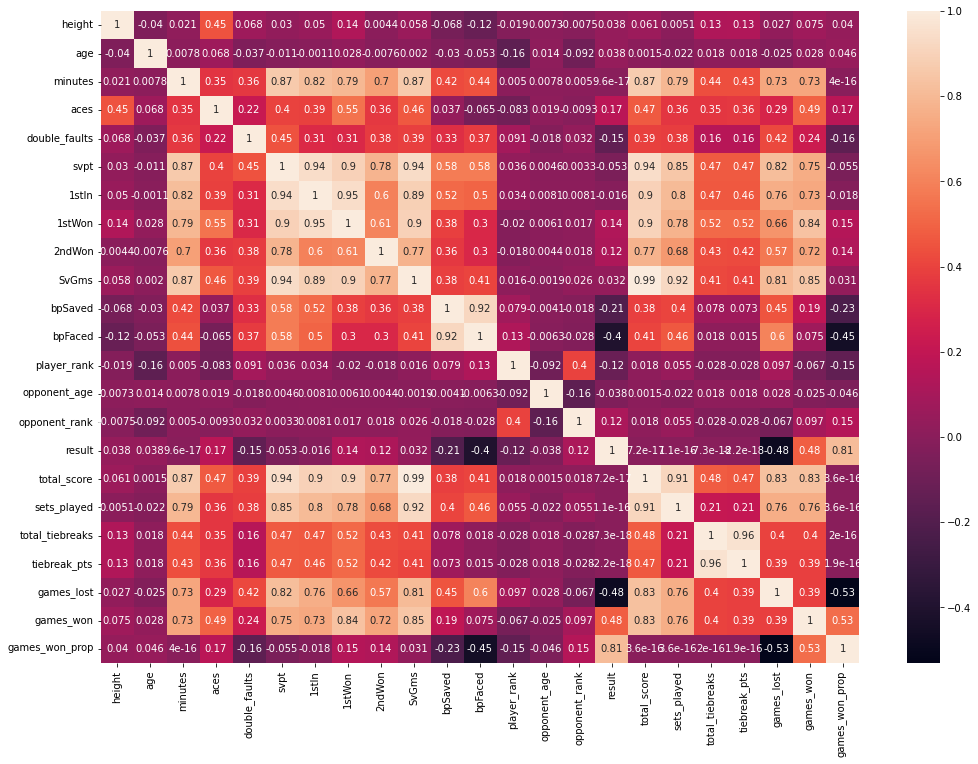

In [288]:
plt.figure(figsize=(17, 12))
correlation_matrix = all_data.corr()

sns.heatmap(correlation_matrix, annot=True)
plt.show()

As one can see above, there are a number of highly-correlated fields

#### Pairplot

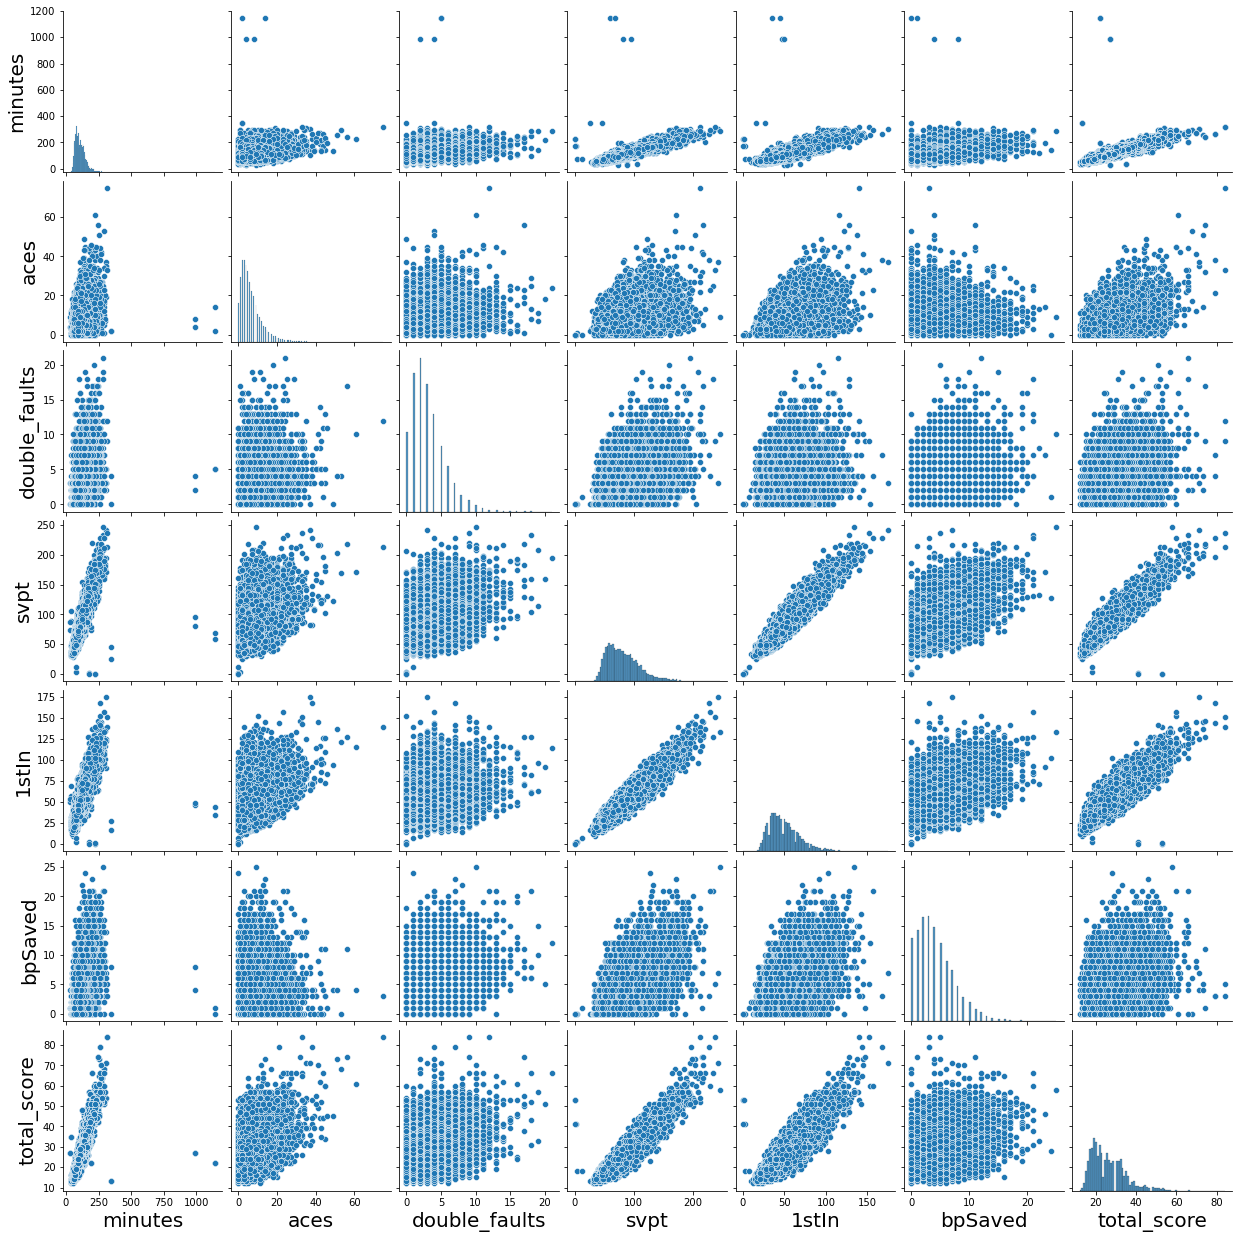

In [289]:
filtered_data = all_data.loc[:,['minutes' ,'aces','double_faults','svpt','1stIn','bpSaved','total_score']].copy()

with sns.plotting_context(rc={"axes.labelsize":20}):
    sns.pairplot(filtered_data)

plt.show()

The pairplot above for selected variables gives insight into many correlations between variables as well as the distributions. For example, it is noted that total_score is positively correlated with minutes, svpt, and 1stin. Furthermore, all of these variables look to be fairly normally distributed with slight right skews.

#### Violin Plot - total serve points ('svpt') 

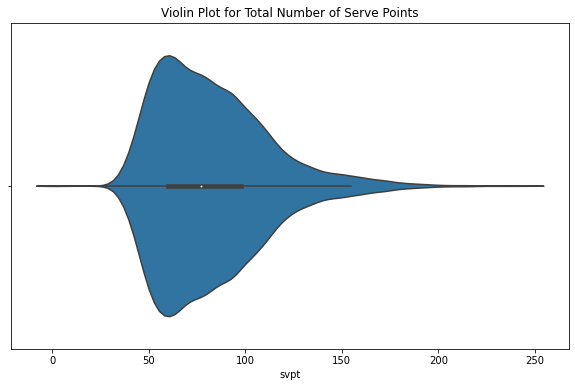

In [290]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(x=all_data['svpt'])
plt.title('Violin Plot for Total Number of Serve Points')
plt.show()

#### Violin Plot - total serve points ('1stIn') - If the first serve of that point was in-bounds 

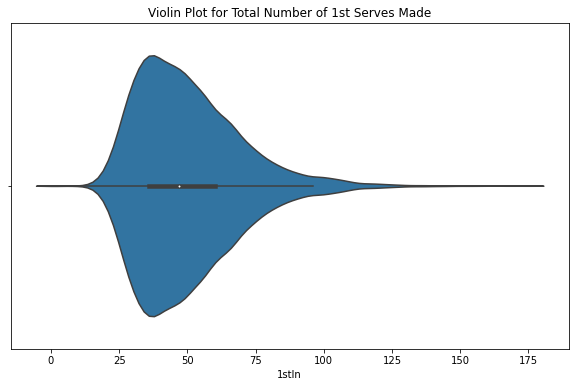

In [291]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(x=all_data['1stIn'])
plt.title('Violin Plot for Total Number of 1st Serves Made')
plt.show()

Total number of serve points and the number of first serves made both have very similar distributions. They are both fairly normal with the median being right around the most dense regions.

#### Violin Plot - total serve points ('total_score') 

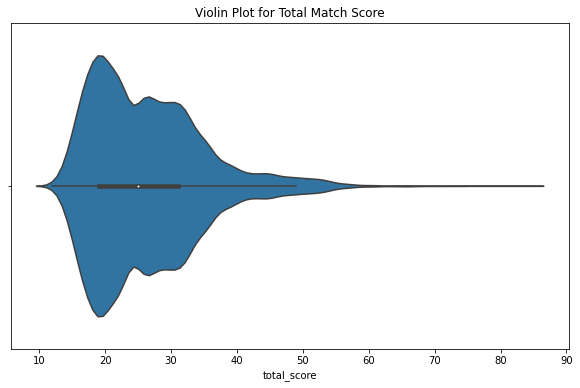

In [292]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(x=all_data['total_score'])
plt.title('Violin Plot for Total Match Score')
plt.show()

Total match score is much less normal, and we see a lot of outliers in the high end. This is because most matches are best of 3 sets, resulting in most matches falling between the interquartile range. However, the grand slams play best of 5, so there are some very lengthy matches. These are the outliers in the plot above, but there are not issues with the data being accurate.

#### Look at the 10 players who have won the match the fastest - Identify Outliers

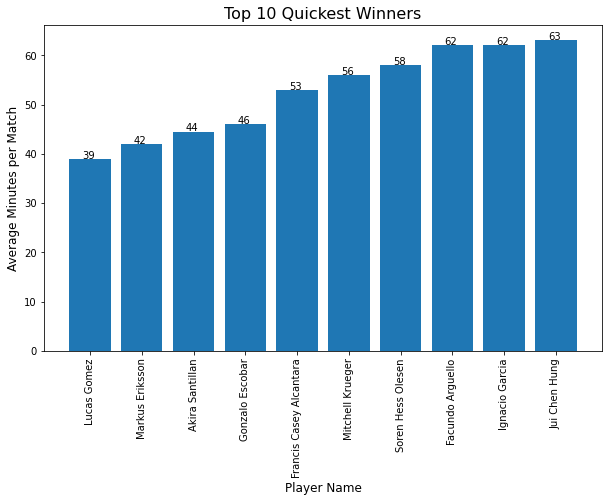

In [293]:
# Filter the data to include only matches won and calculate the average minutes per match
winners = all_data[all_data['result'] == 1]
winners_avg_time = winners.groupby('name')['minutes'].mean().sort_values()[:10]

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(winners_avg_time.index, winners_avg_time.values)

# Add labels to the top of the bars
for i, v in enumerate(winners_avg_time.values):
    ax.text(i-0.15, v+0.1, str(round(v)), fontsize=10)

# Rotate player names
plt.xticks(rotation=90)

# Set plot title and axis labels
ax.set_title('Top 10 Quickest Winners', fontsize=16)
ax.set_xlabel('Player Name', fontsize=12)
ax.set_ylabel('Average Minutes per Match', fontsize=12)

# Show plot
plt.show()

#### Identify top 10 players who have won games the quickest that have 10 or more wins.

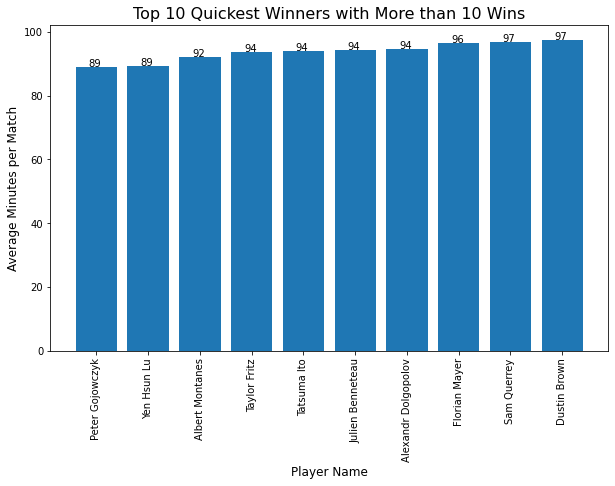

In [294]:
# Filter the data to include only matches won by players who won more than 10 games

winners = all_data[all_data['result'] == 1]
winners_more_than_10 = winners.groupby('name').filter(lambda x: len(x) > 10)
winners_avg_time = winners_more_than_10.groupby('name')['minutes'].mean().sort_values()[:10]

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(winners_avg_time.index, winners_avg_time.values)

# Add labels to the top of the bars
for i, v in enumerate(winners_avg_time.values):
    ax.text(i-0.15, v+0.1, str(round(v)), fontsize=10)

# Rotate player names
plt.xticks(rotation=90)

# Set plot title and axis labels
ax.set_title('Top 10 Quickest Winners with More than 10 Wins', fontsize=16)
ax.set_xlabel('Player Name', fontsize=12)
ax.set_ylabel('Average Minutes per Match', fontsize=12)

plt.show()

# This plot potentially shows who may go on the biggest 'Hot Streaks' where they are feeling confident, this could potentially
# impact further data anlysis to look at who may be most likely to cause upsets regardless of rank

From the bar plot above, we can see that once there is an additional constraint on this metric, then the difference between the top 10 players is much more narrow. This would imply the outliers quick win times are not sustainable.

#### Use histograms to compare 'ace' counts for Top 50 ATP winners against the rest of the field

*'Ace' definition*
- An 'ace' occurs when the player starting a point serves the ball, the ball lands inside the returning player's service box, and the player returning the ball fails to touch the ball with their racquet. Since the ball lands in-bounds, a point is awarded to the player that served the ball.
- Generally speaking, a player that hits a high number of 'aces' each match is considered to have a strong serve.

In [295]:
# creating new column identifying whether or not someone is a Top 50 winningest player
all_data['top_50'] = all_data['name'].apply(lambda x : 'yes' if x in top50_winners.index else 'no')


In [296]:
# df containing 'best of 3' matches
best3_matches = all_data[all_data['best_of'] == 3]

# df containing 'best of 5' matches
best5_matches = all_data[all_data['best_of'] == 5]

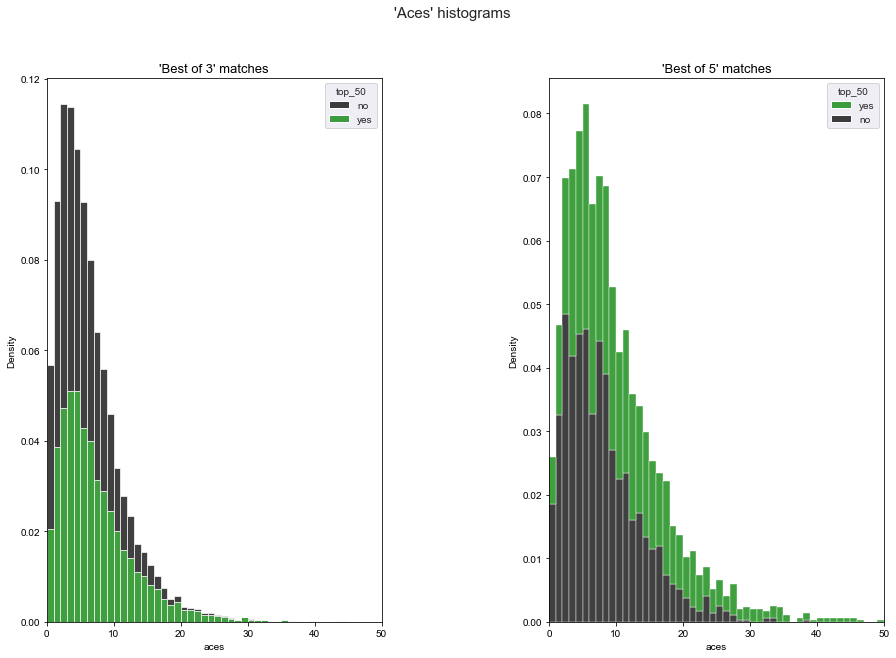

In [297]:
fig, ax = plt.subplots(1, 2, figsize=(15, 10))

sns.set_style('darkgrid')
color_map = {'yes': 'green', 'no': 'black'}
fig.subplots_adjust(wspace=.5)
fig.suptitle("\'Aces\' histograms", fontsize=15)

sns.histplot(best3_matches, x='aces', stat='density', hue='top_50', multiple='stack', binwidth=1, palette=color_map,
             ax=ax[0])
ax[0].set_xlim([0, 50])
ax[0].set_title('\'Best of 3\' matches', fontsize=13)

sns.histplot(best5_matches, x='aces', stat='density', hue='top_50', multiple='stack', binwidth=1, palette=color_map,
             ax=ax[1])
ax[1].set_title('\'Best of 5\' matches', fontsize=13)
ax[1].set_xlim([0, 50])

plt.show()

Among the 'best of 3' matches, it appears that 2 and 3 were the common 'ace' counts in a match. 'Ace' count values were naturally higher in the 'best of 5' matches. The peak of the 'best of 5' histogram occurs when the ace count is equal to 5. Additionally, it's worth mentioning that the right tails of both distributions seem to be dominated by players that were among the Top 50 ATP winners between 2015 and 2017. In order words, players that fell into this category were largely responsible for the unusually high 'ace' counts in the dataset.

#### Create box plots of 'aces' per match 

Compare Top 10 servers against the rest of the ATP Top 50

In [298]:
# identify the top 10 servers that played > 50 matches
# use 'aggregate_stats' function to help with this
top10_servers = aggregate_stats(all_data, 'name').sort_values(by=[('aces', 'mean')], ascending=(False))
top10_servers = top10_servers[top10_servers[('result', 'wins')] > 50][:10]
top10_servers

result                       player_rank opponent_rank opp_age_diff     minutes games_won_prop svptWon_prop 1stIn_prop 1stWon_prop 2ndIn_prop 2ndWon_prop       aces double_faults   bpFaced
                     wins losses win_proportion      median        median         mean        mean           mean         mean       mean        mean       mean        mean       mean          mean      mean
name                                                                                                                                                                                                           
Ivo Karlovic           84     67       0.556291        24.0          59.0     9.903311  116.637562       0.508795     0.737311   0.652649    0.829987   0.850278    0.563411  22.066225      4.629139  3.549669
John Isner            115     66       0.635359        18.0          51.0     3.751381  113.933843       0.528271     0.736707   0.700691    0.808088   0.915856    0.570530  20.370166      2.182320  3.541436
Kevin Anderson         92     64       0.589744        17.0          42.5     2.232051  116.582854       0.524429     0.698647   0.629724    0.789942   0.890609    0.542878  14.621795      3.480769  4.846154
Gilles Muller          95     66       0.590062        37.0          46.0     4.707453  114.974971       0.522497     0.694689   0.613180    0.805820   0.887205    0.522596  14.608696      3.714286  5.099379
Milos Raonic          111     42       0.725490         7.0          29.0    -3.230065  112.166159       0.550242     0.722752   0.634935    0.810033   0.889791    0.572712  14.189542      3.300654  3.954248
Sam Querrey            81     66       0.551020        35.0          52.0     1.219048  101.738785       0.523109     0.683503   0.583864    0.795755   0.902803    0.526272  13.625850      3.312925  5.285714
Nick Kyrgios           91     43       0.679104        21.0          40.0    -7.243284  103.972641       0.550672     0.698843   0.648694    0.778440   0.883784    0.552448  13.470149      3.320896  4.619403
Feliciano Lopez        85     70       0.548387        22.0          49.0     6.530323  114.997327       0.508755     0.668865   0.585006    0.773555   0.912955    0.523794  11.606452      3.245161  6.541935
Marin Cilic           124     65       0.656085         9.0          40.0    -0.239683  116.630537       0.549259     0.684169   0.573794    0.791085   0.921587    0.539429  11.439153      2.772487  5.275132
Jo-Wilfried Tsonga    105     45       0.700000        13.0          42.0     3.094667  116.833054       0.554247     0.695740   0.610313    0.795853   0.917307    0.539160  10.046667      2.813333  4.686667

In [299]:
# creating new column identifying whether or not someone is a Top 10 server
all_data['top_server'] = all_data['name'].apply(lambda x : 'yes' if x in top10_servers.index else 'no')

box_data = all_data.copy()
# only include top servers' and/or Top 50 players' matches
box_data = box_data[(box_data['top_50'] == 'yes') | (box_data['top_server'] == 'yes')]

In [300]:
# check if the top 10 servers are also Top 50 winners
# if so, intersection length will be equal to 10

top10_server_set = set(top10_servers.index)
top50_set = set(top50_winners.index)

len(top10_server_set.intersection(top50_set))

10

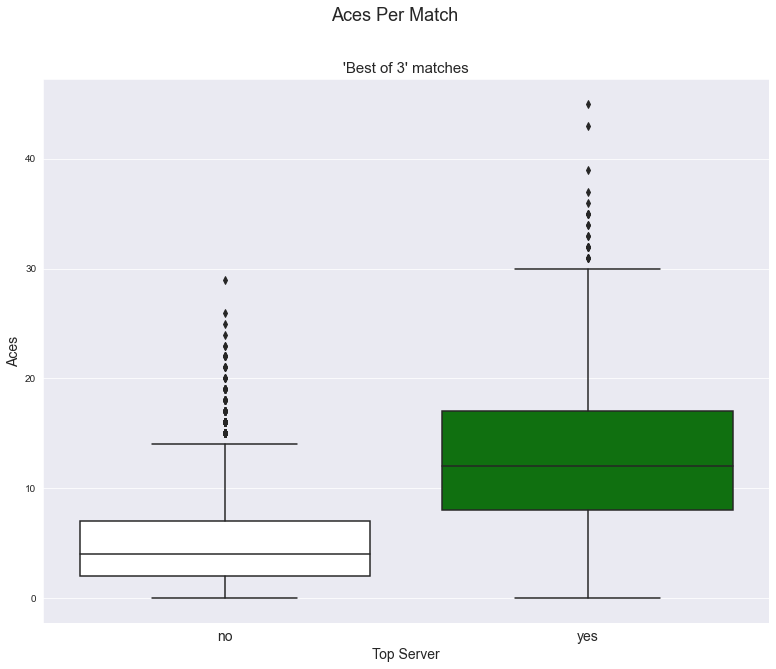

In [301]:
# create boxplot of 'aces' for 'best of 3' matches
plt.figure(figsize=(13, 10))
sns.boxplot(x=box_data[box_data['best_of'] == 3]['top_server'], y=box_data['aces'], palette=['white', 'green'])

plt.xlabel('Top Server', fontsize=14)
plt.ylabel('Aces', fontsize=14)

plt.xticks(fontsize=14)
plt.suptitle('Aces Per Match', fontsize=18)
plt.title('\'Best of 3\' matches', fontsize=15)
plt.show()

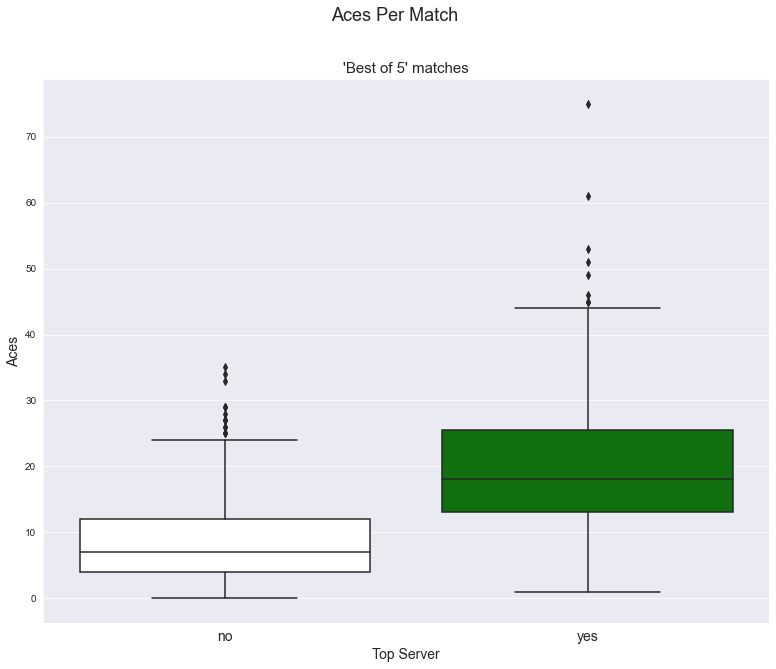

In [302]:
# create boxplot of 'aces' for 'best of 5' matches
plt.figure(figsize=(13, 10))
sns.boxplot(x=box_data[box_data['best_of'] == 5]['top_server'], y=box_data['aces'], palette=['white', 'green'])

plt.xlabel('Top Server', fontsize=14)
plt.ylabel('Aces', fontsize=14)

plt.xticks(fontsize=14)
plt.suptitle('Aces Per Match', fontsize=18)
plt.title('\'Best of 5\' matches', fontsize=15)
plt.show()

In both the 'best of 3' and 'best of 5' matches, the top 10 servers generally had a far larger number of 'aces' per match than the other players in the ATP Top 50.

In [303]:
# identify which player had the most 'aces' in a match during between 2015 and 2017
# OUTLIER CHECK
box_data[['name', 'aces']][box_data['aces'] == box_data['aces'].max()]

,name,aces
12150,Ivo Karlovic,75


While this value of 75 at first glance might appear to be a data entry error, this number is a legitimate outlier because it's indicative of someone's exceptional performance on the court. In fact, this record corresponds to a match at the 2017 Australian Open in which Ivo Karlovic shattered the previous record for the most-ever 'aces' in a match.

#### Create bar chart comparing top servers' stats against the rest of the ATP Top 50 winners

In [304]:
bar_data = all_data.copy()
bar_data = bar_data[(bar_data['top_50'] == 'yes') | (bar_data['top_server'] == 'yes')]
bar_data = aggregate_stats(bar_data, 'top_server')
bar_data = bar_data[[('result', 'win_proportion'), ('1stWon_prop', 'mean'), ('2ndWon_prop', 'mean')]]
bar_data.head()

,result,1stWon_prop,2ndWon_prop
,win_proportion,mean,mean
top_server,,,
no,0.611592,0.729807,0.529006
yes,0.623335,0.798082,0.545464


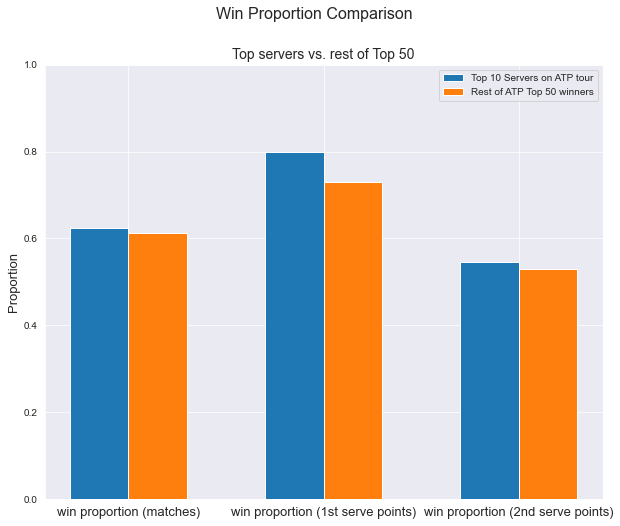

In [305]:
plt.figure(figsize=(10, 8))

x_axis = np.arange(3)
x_labels = ['win proportion (matches)','win proportion (1st serve points)','win proportion (2nd serve points)']
  
plt.bar(x_axis - 0.15, bar_data.iloc[1], 0.3, label = 'Top 10 Servers on ATP tour')
plt.bar(x_axis + 0.15, bar_data.iloc[0], 0.3, label = 'Rest of ATP Top 50 winners')
  
plt.xticks(x_axis, x_labels, fontsize=13)
plt.ylabel("Proportion", fontsize=13)
plt.ylim([0,1])
plt.legend()
plt.suptitle('Win Proportion Comparison', fontsize=16)
plt.title('Top servers vs. rest of Top 50', fontsize=14)
plt.show()

While the top servers essentially win the same proportion of matches as the other ATP 50 winners, they do have more success when it comes to winning the points in which their first serves actually go in.

# Models

#### Implement models to predict match outcomes

#### Decision Tree Model 1

In [307]:
dt_data = all_data.copy()

In [308]:
# create additional fields for classification model
dt_data['age_difference'] = dt_data['age'] - dt_data['opponent_age']
dt_data['rank_difference'] = dt_data['player_rank'] - dt_data['opponent_rank']

In [309]:
# select variables of interest
fields = ['height', 'aces', 'double_faults', '1stWon', '2ndWon', 'bpFaced',
                'age_difference', 'rank_difference', 'opponent_hand', 'result']
dt_data = dt_data[fields]

In [310]:
# scale the numeric fields
scaler = StandardScaler()
numeric_fields = fields[:-2]
dt_data[numeric_fields] = scaler.fit_transform(dt_data[numeric_fields])  

In [311]:
# encode categorical fields
# 1 = R
# 0 = L
le = LabelEncoder()
dt_data['opponent_hand'] = le.fit_transform(dt_data['opponent_hand'])
dt_data['result'] = le.fit_transform(dt_data['result'])

In [312]:
# feature set
X = dt_data.copy()
X = X.drop('result', axis=1)

# class labels
y = dt_data['result'].copy()

X.head()

,height,aces,double_faults,1stWon,2ndWon,bpFaced,age_difference,rank_difference,opponent_hand
0,-0.577872,-0.099785,-0.458872,-1.187776,-0.343916,-1.302575,0.298114,-0.271065,1
1,-0.294767,-0.629118,0.358801,-1.117393,-1.604665,-0.412616,-0.298114,0.271065,1
2,-0.294767,-0.452673,-1.276545,0.219889,0.076334,0.032363,1.838373,-0.202287,1
3,-1.002529,-0.099785,-0.867709,-0.695093,0.356500,0.254853,-1.838373,0.202287,0
4,-0.577872,-0.452673,-1.276545,-1.117393,-0.764166,-0.857596,-1.175896,0.420758,1


In [313]:
# split data into traning & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

# instantiate and train a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# predict outcomes of matches in the test set 
dt_pred = dt_classifier.predict(X_test)
# print the accuracy score
dt_acc = accuracy_score(y_test, dt_pred)

print("decision tree accuracy: ", dt_acc)

decision tree accuracy:  0.6844047985235312


In [314]:
# access model's 'feature importance' values
feat_importance = list(zip(X.columns, dt_classifier.feature_importances_))
feat_importance.sort(key=lambda x: x[1], reverse=True)

for val in feat_importance:
    print(f"{val[0]}: ", val[1])

bpFaced:  0.24040115212263444
rank_difference:  0.1959133348969493
1stWon:  0.1466725258187619
age_difference:  0.11332196524104665
2ndWon:  0.09699913824251803
height:  0.06763719704744996
aces:  0.06694751056627933
double_faults:  0.05859735579817326
opponent_hand:  0.013509820266187205


#### Decision Tree Model 2 (using 'gridsearchcv')

In [315]:
dt2_data = dt_data.copy()

In [316]:
X2 = dt_data.drop('result', axis=1)
y2 = dt_data['result'].copy()

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [317]:
pipeline = Pipeline([('dt', dt_classifier)])

param_grid = {'dt__criterion': ['gini', 'entropy'], 'dt__max_depth': [None, 2, 4, 6, 8, 10],
              'dt__min_samples_leaf': [1, 2, 4]}

dt_grid_cv = GridSearchCV(pipeline, param_grid=param_grid, scoring='accuracy', cv=5)
dt_grid_cv.fit(X2_train, y2_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('dt',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'dt__criterion': ['gini', 'entropy'],
                         'dt__max_depth': [None, 2, 4, 6, 8, 10],
                         'dt__min_samples_leaf': [1, 2, 4]},
             scoring='accuracy')

In [318]:
# predict match outcomes again
dt_grid_pred = dt_grid_cv.predict(X2_test)
# get accuracy score (it improves)
dt_grid_acc = accuracy_score(y2_test, dt_grid_pred)
print("decision tree 2 accuracy: ", dt_grid_acc)


decision tree 2 accuracy:  0.7462319286373423


In [319]:
# access best estimator's 'feature importance' values
best_estimator = dt_grid_cv.best_estimator_

best_feat_importance = list(zip(X2.columns, best_estimator['dt'].feature_importances_))
best_feat_importance.sort(key=lambda x: x[1], reverse=True)

for val in best_feat_importance:
    print(f"{val[0]}: ", val[1])

bpFaced:  0.5067457097029021
1stWon:  0.2237396104877465
rank_difference:  0.196600490095688
2ndWon:  0.058702374996432063
double_faults:  0.006543058476545187
age_difference:  0.003105960321236777
aces:  0.0028229785468808395
height:  0.001739817372568496
opponent_hand:  0.0


According to both decision trees, breakpoints faced (bpFaced), 1st serve points won (1stWon), and the difference in players' rankings (rank_difference) were the most useful features when it came to predicting whether a player won or lost. It also isn't surprising that some of these attributes (i.e. opponent 'age_difference') have feature importance values that are essentially equal to 0. For example, Roger Federer remained a dominant player during these seasons despite being far older than many of his opponents.

In [320]:
# on average, Roger Federer was 6.73 years older than his opponents between 2015 and 2017
top10.loc['Roger Federer'][('opp_age_diff', 'mean')]

6.730967741935483

#### Random Forest Models

We're attempting to optimize Decision Tree and Random Forest Models to improve prediction accuracy.

In [88]:

columns_to_drop = ['tourney_id', 'games_lost', 'tourney_date', 'country', 'tourney_name', 'id', 'name', 'opponent_id', 'score', 'best_of', 
                   'round', 'games_won', 'games_won_prop', 'top_50', 'top_server']
data = all_data.drop(columns=columns_to_drop)
# data.dtypes

In [89]:
data.head()

,surface,draw_size,tourney_level,match_num,seed,hand,height,age,minutes,aces,double_faults,svpt,1stIn,1stWon,2ndWon,SvGms,bpSaved,bpFaced,player_rank,opponent_hand,opponent_age,opponent_rank,result,total_score,sets_played,total_tiebreaks,tiebreak_pts
0,Hard,28,A,1,0,R,183,25.5,65.0,6,2,44,24,19,14,8,1,1,153,R,23.7,220,1,16,2,0,0
1,Hard,28,A,1,0,R,185,23.7,65.0,3,4,50,31,20,5,8,1,5,220,R,25.5,153,0,16,2,0,0
2,Hard,28,A,2,0,L,185,33.4,104.0,4,0,92,59,39,17,14,4,7,73,R,22.3,123,1,27,3,0,0
3,Hard,28,A,2,0,R,180,22.3,104.0,6,1,83,50,26,19,13,3,8,123,L,33.4,73,0,27,3,0,0
4,Hard,28,A,3,0,R,183,22.9,68.0,4,0,45,27,20,11,8,2,3,125,R,30.0,21,1,16,2,0,0


In [90]:
# le = LabelEncoder()# 
data['surface'] = le.fit_transform(all_data['surface'])
data['tourney_level'] = le.fit_transform(all_data['tourney_level'])
data['hand'] = le.fit_transform(all_data['hand'])
data['opponent_hand'] = le.fit_transform(all_data['opponent_hand'])
# data.dtypes

In [91]:
data.head()

,surface,draw_size,tourney_level,match_num,seed,hand,height,age,minutes,aces,double_faults,svpt,1stIn,1stWon,2ndWon,SvGms,bpSaved,bpFaced,player_rank,opponent_hand,opponent_age,opponent_rank,result,total_score,sets_played,total_tiebreaks,tiebreak_pts
0,3,28,0,1,0,1,183,25.5,65.0,6,2,44,24,19,14,8,1,1,153,1,23.7,220,1,16,2,0,0
1,3,28,0,1,0,1,185,23.7,65.0,3,4,50,31,20,5,8,1,5,220,1,25.5,153,0,16,2,0,0
2,3,28,0,2,0,0,185,33.4,104.0,4,0,92,59,39,17,14,4,7,73,1,22.3,123,1,27,3,0,0
3,3,28,0,2,0,1,180,22.3,104.0,6,1,83,50,26,19,13,3,8,123,0,33.4,73,0,27,3,0,0
4,3,28,0,3,0,1,183,22.9,68.0,4,0,45,27,20,11,8,2,3,125,1,30.0,21,1,16,2,0,0


In [92]:
# Define the input features and the target variable
X = data.drop(['result'], axis=1)
y = all_data['result']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# Create a random forest classifier with 100 estimators
rf = RandomForestClassifier(n_estimators=100, random_state=1)
# Fit the model on the training data
rf.fit(X_train, y_train)
# Make predictions on the test data
y_pred = rf.predict(X_test)
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7958612975391499


In [93]:
best_feat_importance = list(zip(X_train.columns, rf.feature_importances_))
best_feat_importance.sort(key=lambda x: x[1], reverse=True)

for val in best_feat_importance:
    print(f"{val[0]}: ", val[1])

bpFaced:  0.17596105189240338
opponent_rank:  0.08423887056078677
1stWon:  0.07756002992488624
player_rank:  0.06276085212422473
2ndWon:  0.052536601178072594
bpSaved:  0.05083959884906663
svpt:  0.04454672200259194
minutes:  0.041770927866683544
opponent_age:  0.04063467227493095
1stIn:  0.03937129066341292
age:  0.039337550847269295
aces:  0.038969372750767985
match_num:  0.03778714282782734
total_score:  0.03296634389169275
double_faults:  0.028937591315809662
height:  0.027136213765668212
tiebreak_pts:  0.02443129673840938
SvGms:  0.020756058768098315
seed:  0.020678237498660622
draw_size:  0.015005792715980924
total_tiebreaks:  0.011327806184698823
surface:  0.00874379198329031
tourney_level:  0.008633016765168665
sets_played:  0.005413265635403766
opponent_hand:  0.004933209808757168
hand:  0.004722691165437205


In [94]:
for model in [DecisionTreeClassifier(random_state=0), RandomForestClassifier(random_state=0)]:
    model.fit(X_train, y_train)
    scores = cross_validate(model, X_train, y_train, scoring=('accuracy'))
    print()
    print(model)
    print("Accuracy:", scores['test_score'].mean())


DecisionTreeClassifier(random_state=0)
Accuracy: 0.7322749354319071

RandomForestClassifier(random_state=0)
Accuracy: 0.7961057942349962


In [95]:
# Take your top performing model (RFC) and do a randomized search cv with 20 iterations
# and three folds.

new_params = {'bootstrap': (True, False),
              'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110],
              'max_features': ['auto', 'sqrt'],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
              }
rfc_grid = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=new_params, cv=3, n_jobs=3,
                              n_iter=20)
rfc_grid.fit(X_train, y_train)
print(rfc_grid.best_estimator_)

RandomForestClassifier(bootstrap=False, max_depth=40, max_features='sqrt',
                       min_samples_split=5, n_estimators=1800)


In [96]:
# Take your best_estimator_ and see how it compares by doing cross_vals for Accuracy.
rfc = rfc_grid.best_estimator_
rfc.fit(X_train, y_train)
acc = cross_val_score(rfc, X_train, y_train, scoring='accuracy')
print("\nAccuracy:", acc.mean())


Accuracy: 0.7992285573402206


In [97]:
# Finally, run predictions on your test set with this model, and see how your r2 score and RMSE look.
prediction = rfc.predict(X_test)
print("\nAccuracy_Score:", accuracy_score(y_test, prediction))


Accuracy_Score: 0.801826994780015


From this optimization attempt we can see our model increased in accuracy by nearly .5%. While the increase isn't significant, obtaining a 80% prediction accuracy is good based on other data. The next steps would be to build out a prediction model that handles data as it is being logged to attempt real-time predictions.